# **Question 1**
## **[m1] Prepare for text + data cleaning**
**Download novels.**

**Combine novels as a large text.**

In [64]:
import os

# Set novel folder path
folder_path = r"D:\coursework_data\AI\novels"
output_path = r"D:\coursework_data\AI\combined_raw_text.txt"

# Combine text content
all_text = ""
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8', errors='ignore') as file:
            print(f"Adding {filename}")
            content = file.read()
            all_text += content + "\n\n"  # leave two lines between each book

# Save the combined text
with open(output_path, 'w', encoding='utf-8') as out_file:
    out_file.write(all_text)

print(f"\ncomplete, file saved in：{output_path}")


Adding A Room with a View.txt
Adding Anne of Green Gables.txt
Adding The Secret Adversary.txt
Adding This Side of Paradise.txt

complete, file saved in：D:\coursework_data\AI\combined_raw_text.txt


**Clean the text**<br>
•  Remove copyright information(Navigate to "START OF THE PROJECT GUTENBERG EBOOK" and start intercepting text from there, skipping all copyright notes).<br>
•  remove punctuation, special symbols, all lowercase, etc.).

In [67]:
import re
from collections import Counter

# Set the input and output paths
input_path = r"D:\coursework_data\AI\combined_raw_text.txt"
cleaned_output_path = r"D:\coursework_data\AI\combined_cleaned_text.txt"

# Initialize variable
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
found_start = False
cleaned_lines = []

# Read by row, locate the starting position and clean in segments
with open(input_path, 'r', encoding='utf-8') as file:
    for line in file:
        if not found_start:
            if start_marker in line:
                found_start = True
            continue  
        # Clean each line
        line = line.lower() #lowercase
        line = re.sub(r'[^a-z\s]', '', line) # Keep only letters and Spaces
        line = re.sub(r'\s+', ' ', line) # Merge multiple spaces into one space
        cleaned_lines.append(line.strip())

# Write the cleaned contents to a new file
cleaned_text = ' '.join(cleaned_lines)
with open(cleaned_output_path, 'w', encoding='utf-8') as f:
    f.write(' '.join(cleaned_lines))

print(f"Clean finished, save to：{cleaned_output_path}")

# Step 3: Text statistics and word frequency
words = cleaned_text.split()
total_words = len(words)
unique_words = len(set(words))
word_freq = Counter(words)
most_common_words = word_freq.most_common(30)

# Output statistics
print(f"\n Total words in corpus: {total_words}")
print(f" Unique words: {unique_words}")

print("\n Top 30 most frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

print("\n Sample cleaned text (first 50 words):")
print(' '.join(words[:50]) + " ...")

Clean finished, save to：D:\coursework_data\AI\combined_cleaned_text.txt

 Total words in corpus: 336934
 Unique words: 20256

 Top 30 most frequent words:
the: 15545
and: 9469
to: 8820
a: 7716
of: 7378
i: 6118
in: 4945
you: 4703
it: 4565
was: 4403
that: 4226
he: 3878
she: 3665
her: 3325
with: 2603
had: 2490
for: 2303
but: 2299
as: 2143
his: 2095
at: 2051
be: 2016
is: 1931
on: 1878
not: 1802
said: 1750
have: 1644
all: 1553
so: 1466
me: 1409

 Sample cleaned text (first 50 words):
illustration a room with a view by e m forster contents part one chapter i the bertolini chapter ii in santa croce with no baedeker chapter iii music violets and the letter s chapter iv fourth chapter chapter v possibilities of a pleasant outing chapter vi the reverend arthur beebe ...


## **[m2] : Construct a target vocabulary L with 100 non-functional words:**<br>



In [70]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [71]:
# Download resources(only once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
import nltk
from collections import Counter, defaultdict

from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords

# Set path
input_path = r"D:\coursework_data\AI\combined_cleaned_text.txt"
output_path = r"D:\coursework_data\AI\wordlist_L.txt"

# Define a garbage words list
custom_garbage_words = {
    "dec", "th", "letter", "chapter", "contents", "saville", "gutenberg", "project",
    "marilla", "tuppence", "anne", "amory", "julius", "lucy", "matthew", "tommy", "diana",
    "im", "ill", "ive", "youre", "thats", "dont", "oh", "cecil", "beebe", "bartlett", "jane", "miss", "mrs", "sir",
    "something", "nothing", "anything", "thing", "things", "james"
}

# Load text and divide word
with open(input_path, "r", encoding="utf-8") as f:
    text = f.read()

tokens = word_tokenize(text)

# Step 1: Statistical distribution of true parts of speech in the whole vocabulary (uncleaned)
all_tagged = pos_tag(tokens)

pos_groups = {
    'Noun': ['NN', 'NNS'],
    'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjective': ['JJ', 'JJR', 'JJS'],
    'Adverb': ['RB', 'RBR', 'RBS']
}
excluded_tags = {'NNP', 'NNPS'}  # Exclude proper nouns

pos_distribution = Counter()
for _, tag in all_tagged:
    for group, taglist in pos_groups.items():
        if tag in taglist:
            pos_distribution[group] += 1
            break

total_content_words = sum(pos_distribution.values())
category_allocation = {}
for group in pos_groups:
    ratio = pos_distribution[group] / total_content_words
    category_allocation[group] = int(ratio * 100)

# Complement to 100
current_total = sum(category_allocation.values())
if current_total < 100:
    max_group = max(category_allocation, key=category_allocation.get)
    category_allocation[max_group] += (100 - current_total)

print("\n Word category allocation (based on full corpus):")
for k, v in category_allocation.items():
    print(f"{k:<10}: {v} words")

# Step 2: Clean words to build a list of candidate words
stop_words = set(stopwords.words('english'))
filtered_tokens = [w.lower() for w in tokens if w.isalpha() and w.lower() not in stop_words]

tagged_filtered = pos_tag(filtered_tokens)

grouped = defaultdict(list)
for word, tag in tagged_filtered:
    if tag in excluded_tags:  # Exclusion of proper nouns
        continue
    if len(word) <= 2:
        continue
    if word.lower() in custom_garbage_words:
        continue
    for category, taglist in pos_groups.items():
        if tag in taglist:
            grouped[category].append(word)
            break

# Step 3: Extract high-frequency words = for each type
final_wordlist = []
for category, num in category_allocation.items():
    freq_counter = Counter(grouped[category])
    top_words = [w for w, _ in freq_counter.most_common(num)]
    final_wordlist.extend(top_words)

# Step 4: Pick unique words and complement to 100 words
unique_words = list(dict.fromkeys(final_wordlist))  # pick unique
if len(unique_words) < 100:
    all_content_words = [w for group in grouped.values() for w in group]
    all_freq_sorted = [w for w, _ in Counter(all_content_words).most_common()]
    for word in all_freq_sorted:
        if word not in unique_words:
            unique_words.append(word)
        if len(unique_words) == 100:
            break

# Step 5: Output the word list L
with open(output_path, "w", encoding="utf-8") as f:
    for word in final_wordlist:
        f.write(word + "\n")

print(f"\n Final cleaned wordlist saved to: {output_path}")
print(" Sample words:", final_wordlist[:10])
print(f" Total words in L: {len(final_wordlist)}")



 Word category allocation (based on full corpus):
Noun      : 39 words
Verb      : 35 words
Adjective : 15 words
Adverb    : 11 words

 Final cleaned wordlist saved to: D:\coursework_data\AI\wordlist_L.txt
 Sample words: ['man', 'time', 'people', 'eyes', 'way', 'life', 'girl', 'night', 'room', 'work']
 Total words in L: 100


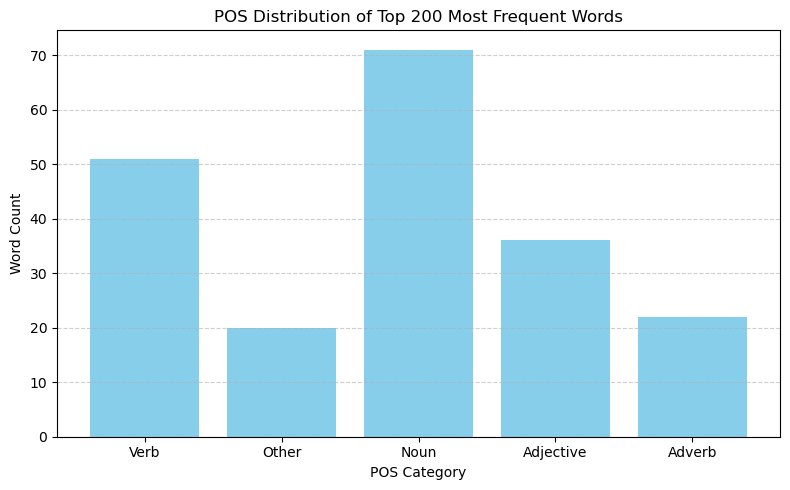

In [75]:
import matplotlib.pyplot as plt
from nltk import pos_tag
from collections import Counter

# Get the top 200 high-frequency words
top_200_words = [word for word, _ in Counter(filtered_tokens).most_common(200)]
tagged_top_200 = pos_tag(top_200_words)

# POS mapping
pos_groups = {
    'Noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjective': ['JJ', 'JJR', 'JJS'],
    'Adverb': ['RB', 'RBR', 'RBS']
}

# classified statistic
pos_category = []
for word, tag in tagged_top_200:
    for group, tag_list in pos_groups.items():
        if tag in tag_list:
            pos_category.append(group)
            break
    else:
        pos_category.append("Other")

pos_counts = Counter(pos_category)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("POS Distribution of Top 200 Most Frequent Words")
plt.xlabel("POS Category")
plt.ylabel("Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("pos_distribution_top200.png")
plt.show()


## **[m3]:**

**Average distance**

100%|████████████████████████████████████████████████████████████████████████████| 4950/4950 [00:00<00:00, 5493.07it/s]


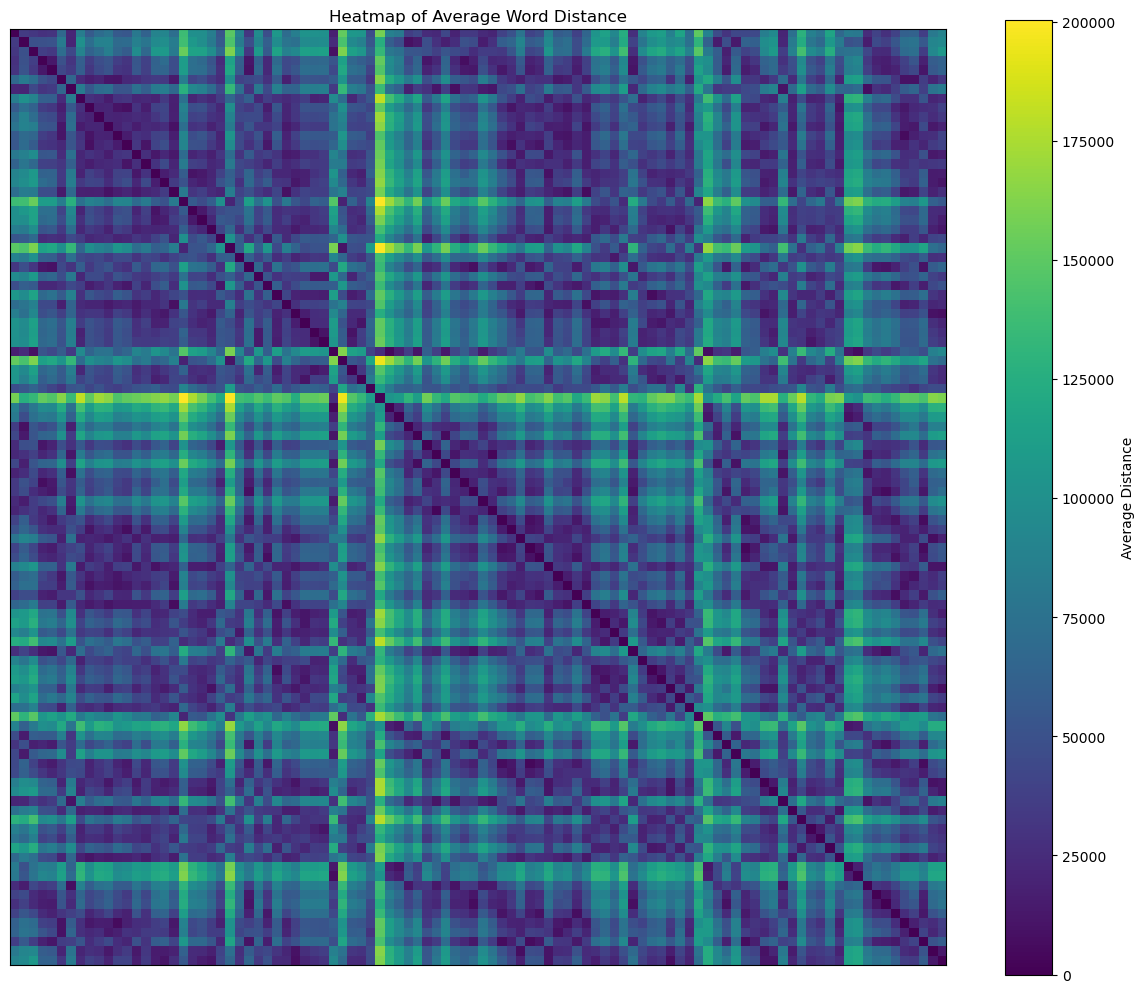

In [76]:
import pandas as pd
import numpy as np
from itertools import combinations
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load cleaned text and L wordlist
with open(r"D:\coursework_data\AI\combined_cleaned_text.txt", "r", encoding="utf-8") as f:
    text = f.read()
with open(r"D:\coursework_data\AI\wordlist_L.txt", "r", encoding="utf-8") as f:
    wordlist = [line.strip().lower() for line in f.readlines() if line.strip()]

# Tokenize text
tokens = text.split()
word_positions = {word: [] for word in wordlist}

# Record positions of each word in L
for idx, token in enumerate(tokens):
    if token in word_positions:
        word_positions[token].append(idx)

# Greedy pairing without max window
def greedy_pair_distances(pos1, pos2):
    i, j = 0, 0
    distances = []

    while i < len(pos1) and j < len(pos2):
        distances.append(abs(pos1[i] - pos2[j]))
        i += 1
        j += 1

    if distances:
        return np.mean(distances)
    else:
        return np.nan

# Initialize average distance matrix
avg_matrix = pd.DataFrame(index=wordlist, columns=wordlist, dtype=float)

# Compute distances for all word pairs (symmetric)
for w1, w2 in tqdm(combinations(wordlist, 2), total=(len(wordlist) * (len(wordlist) - 1)) // 2):
    avg = greedy_pair_distances(word_positions[w1], word_positions[w2])
    avg_matrix.at[w1, w2] = avg_matrix.at[w2, w1] = avg

# Diagonal distances are zero
for w in wordlist:
    avg_matrix.at[w, w] = 0

# Save average distance matrix
avg_matrix.to_csv(r"D:\coursework_data\AI\matrix_avg_distance.csv")

# Display heatmap (but do not save)
plt.figure(figsize=(12, 10))
plt.imshow(avg_matrix.astype(float), cmap='viridis', interpolation='nearest')
plt.colorbar(label="Average Distance")
plt.title("Heatmap of Average Word Distance")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\average_word_distance_heatmap.png')
plt.show()


In [80]:
# Load the average distance matrix
avg_matrix_path = r"D:\coursework_data\AI\matrix_avg_distance.csv"
avg_matrix = pd.read_csv(avg_matrix_path, index_col=0)

# Check for any NaN values (indicating unmatched word pairs)
num_total = avg_matrix.size
num_nan = avg_matrix.isna().sum().sum()
nan_percentage = (num_nan / num_total) * 100

# Find all word pairs that have NaN (unmatched)
unmatched_pairs = []
for i in range(len(avg_matrix)):
    for j in range(i + 1, len(avg_matrix)):
        if pd.isna(avg_matrix.iat[i, j]):
            unmatched_pairs.append((avg_matrix.index[i], avg_matrix.columns[j]))

num_words = len(avg_matrix)

{
    "Size": num_words,
    "Total distance pairs": num_total,
    "Unmatched pairs": num_nan,
    "Percentage of unmatched": f"{nan_percentage:.2f}%",
    "The example does not match a pair": unmatched_pairs[:5]
}

{'Size': 100,
 'Total distance pairs': 10000,
 'Unmatched pairs': 0,
 'Percentage of unmatched': '0.00%',
 'The example does not match a pair': []}

In [82]:
# Flatten upper triangle to find closest and furthest pairs
pairs = []
for i, w1 in enumerate(avg_matrix.index):
    for j, w2 in enumerate(avg_matrix.columns):
        if j > i:
            dist = avg_matrix.iloc[i, j]
            if not pd.isna(dist):
                pairs.append((w1, w2, dist))

# Sort by distance
pairs_sorted = sorted(pairs, key=lambda x: x[2])

# Top 5 closest and furthest pairs
closest_pairs = pairs_sorted[:5]
furthest_pairs = pairs_sorted[-5:]

print(f"Top 5 closest pairs: {closest_pairs}")
print(f"Top 5 furthest pairs: {furthest_pairs}")

Top 5 closest pairs: [('came', 'thought', 3787.493606138107), ('honeychurch', 'know', 4133.855263157895), ('felt', 'last', 4660.016835016835), ('course', 'even', 5978.291828793775), ('felt', 'away', 6599.548821548821)]
Top 5 furthest pairs: [('said', 'turned', 179529.0934065934), ('night', 'said', 180851.5338078292), ('hes', 'said', 195483.7073170732), ('years', 'said', 199708.14285714287), ('men', 'said', 200250.5837563452)]


## **[m4]**

D:\Users\TEMP\ipykernel_13416\2712977753.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(avg_matrix, method='ward')


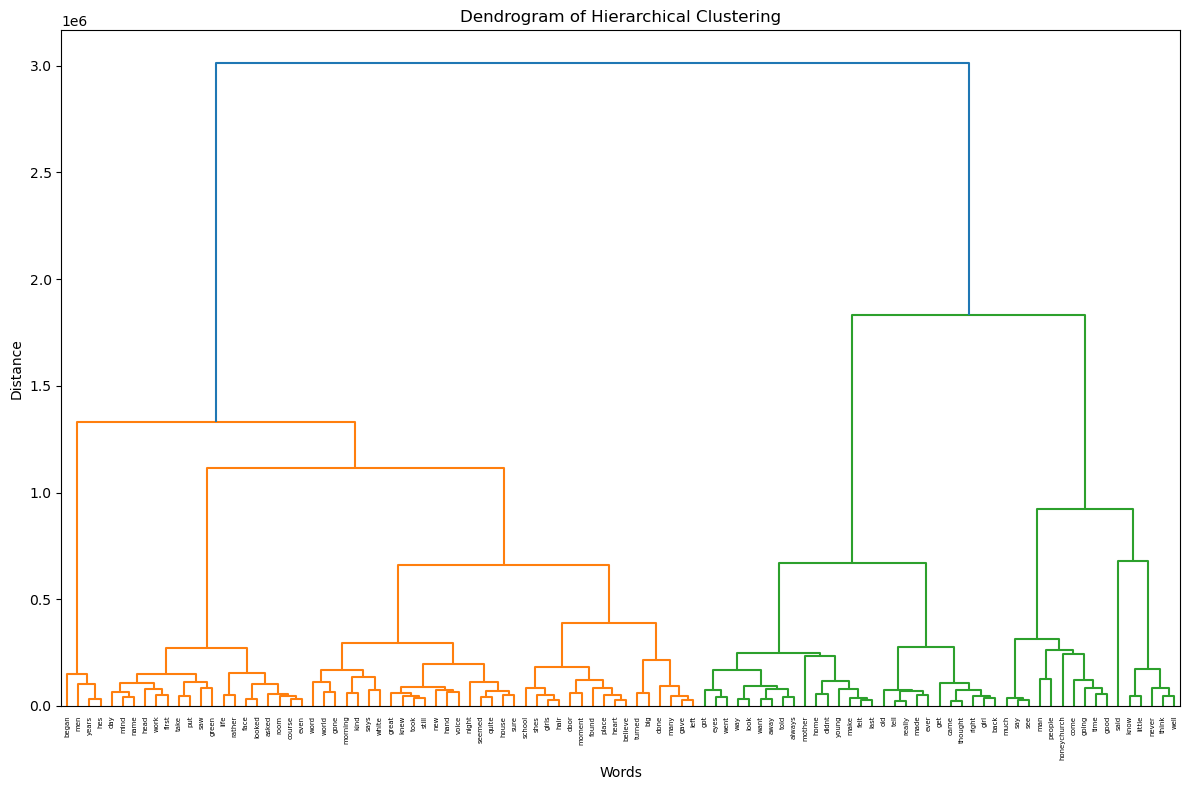

In [85]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the average distance matrix
avg_matrix = pd.read_csv(r"D:\coursework_data\AI\matrix_avg_distance.csv", index_col=0)

# Hierarchical Clustering (Agglomerative)
linked = linkage(avg_matrix, method='ward')

# DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=3)  # Example values for eps and min_samples
dbscan_labels = dbscan.fit_predict(avg_matrix)

# Re-run Dendrogram without 'below_threshold_color' and 'above_threshold_color'
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=avg_matrix.index.to_list())
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\Dendrogram of Hierarchical Clustering.png')
plt.show()

D:\Users\lenovo\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


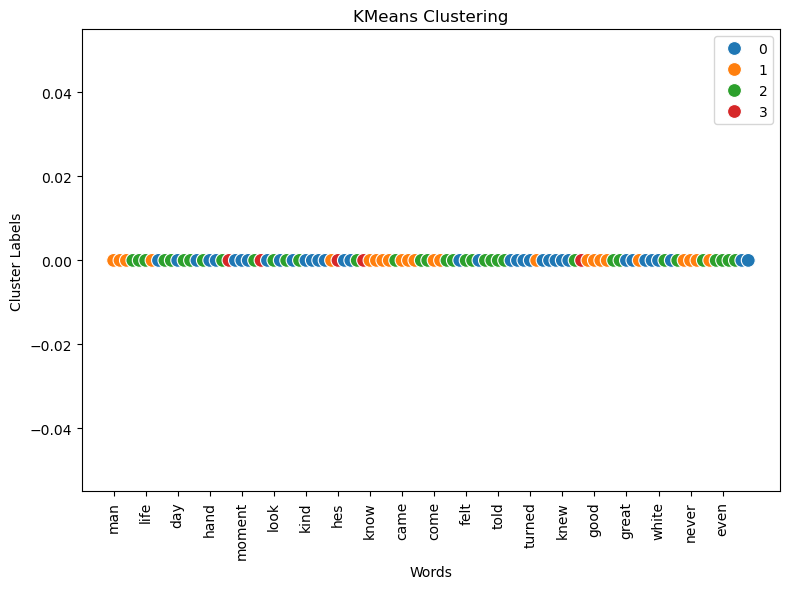

array([1, 1, 1, 2, 2, 2, 1, 0, 2, 2])

In [86]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Let's start with 5 clusters
kmeans_labels = kmeans.fit_predict(avg_matrix)

# Plot KMeans clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(avg_matrix)), y=[0]*len(avg_matrix), hue=kmeans_labels, palette="tab10", s=100, marker='o')
plt.title("KMeans Clustering")
plt.xlabel("Words")
plt.ylabel("Cluster Labels")
plt.xticks(range(0, len(avg_matrix), 5), avg_matrix.index.to_list()[::5], rotation=90)
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\KMeans Clustering.png')
plt.show()

# Output first few clustering results to check
kmeans_labels[:10] # Show the first 10 clustering labels to check results

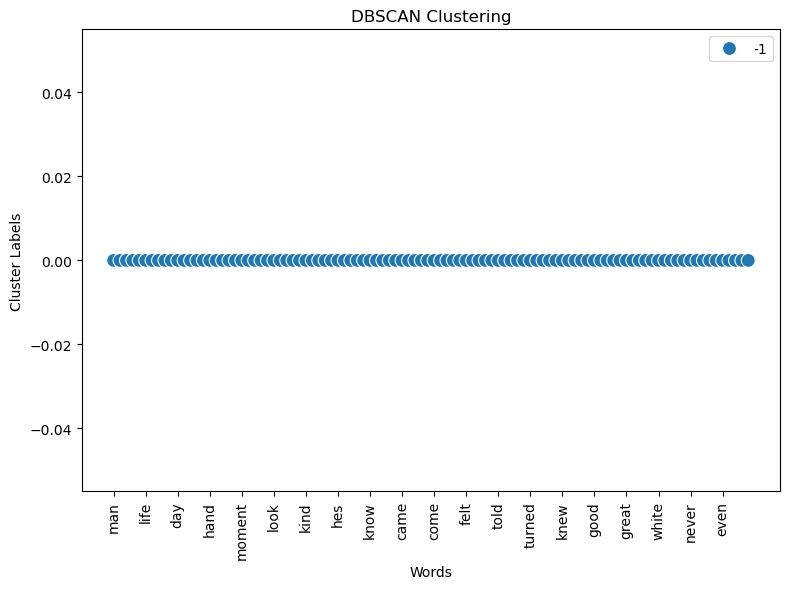

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [87]:
# DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=3)  # Example values for eps and min_samples
dbscan_labels = dbscan.fit_predict(avg_matrix)

# Plot DBSCAN clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(avg_matrix)), y=[0]*len(avg_matrix), hue=dbscan_labels, palette="tab10", s=100, marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("Words")
plt.ylabel("Cluster Labels")
plt.xticks(range(0, len(avg_matrix), 5), avg_matrix.index.to_list()[::5], rotation=90)
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\DBSCAN Clustering.png')
plt.show()

# Output first few clustering results to check
dbscan_labels[:10]  # Show the first 10 clustering labels to check results

In [90]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Prepare data (already loaded as avg_matrix)
X = avg_matrix.values

# Remove DBSCAN noise (-1) before evaluating silhouette etc.
valid_kmeans = silhouette_score(X, kmeans_labels)
valid_ch_kmeans = calinski_harabasz_score(X, kmeans_labels)
valid_db_kmeans = davies_bouldin_score(X, kmeans_labels)

# Hierarchical: use same cluster number as KMeans (cut dendrogram)
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linked, t=5, criterion='maxclust')

valid_hier = silhouette_score(X, hierarchical_labels)
valid_ch_hier = calinski_harabasz_score(X, hierarchical_labels)
valid_db_hier = davies_bouldin_score(X, hierarchical_labels)

# DBSCAN: check how many are noise
noise_ratio = np.sum(dbscan_labels == -1) / len(dbscan_labels)

# Compile into a DataFrame for display
metrics_df = pd.DataFrame({
    "Method": ["KMeans", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [valid_kmeans, valid_hier, np.nan],
    "Calinski-Harabasz Index": [valid_ch_kmeans, valid_ch_hier, np.nan],
    "Davies-Bouldin Index": [valid_db_kmeans, valid_db_hier, np.nan],
    "Noise Ratio (DBSCAN only)": [np.nan, np.nan, noise_ratio]
})

metrics_df

,Method,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index,Noise Ratio (DBSCAN only)
0,KMeans,0.433365,90.689346,0.748034,NaN
1,Hierarchical,0.386469,102.670673,0.680840,NaN
2,DBSCAN,NaN,NaN,NaN,1.0


D:\Users\TEMP\ipykernel_13416\540081410.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(avg_matrix, method='ward')


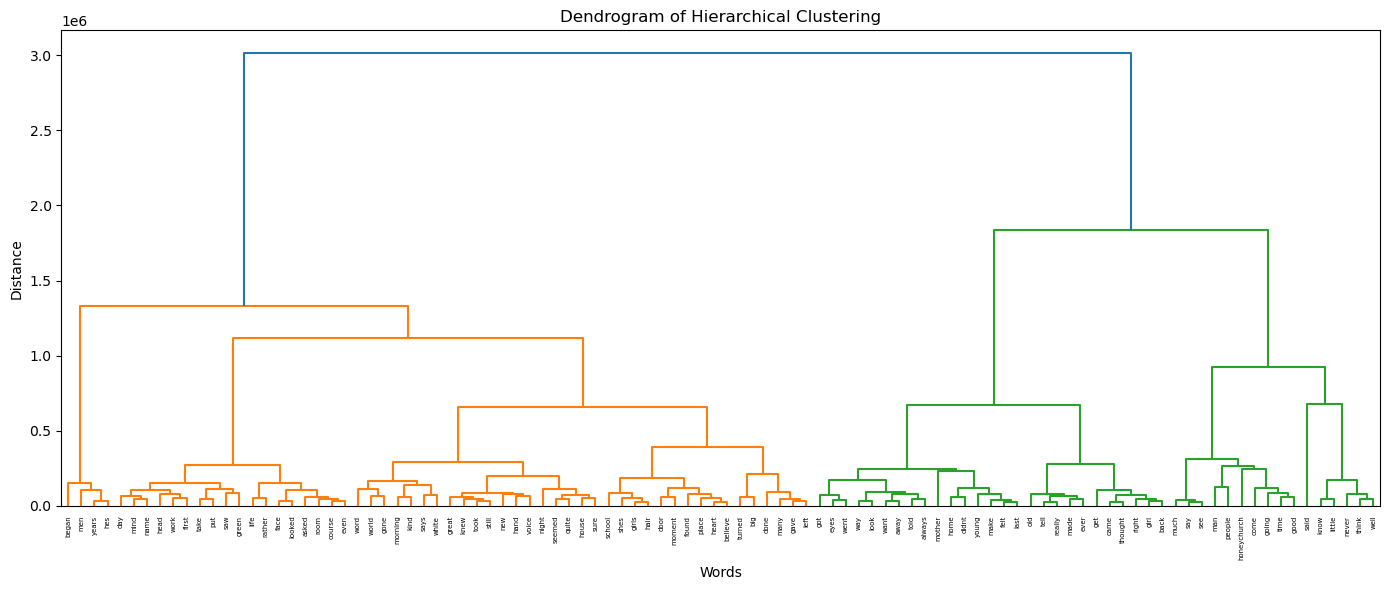

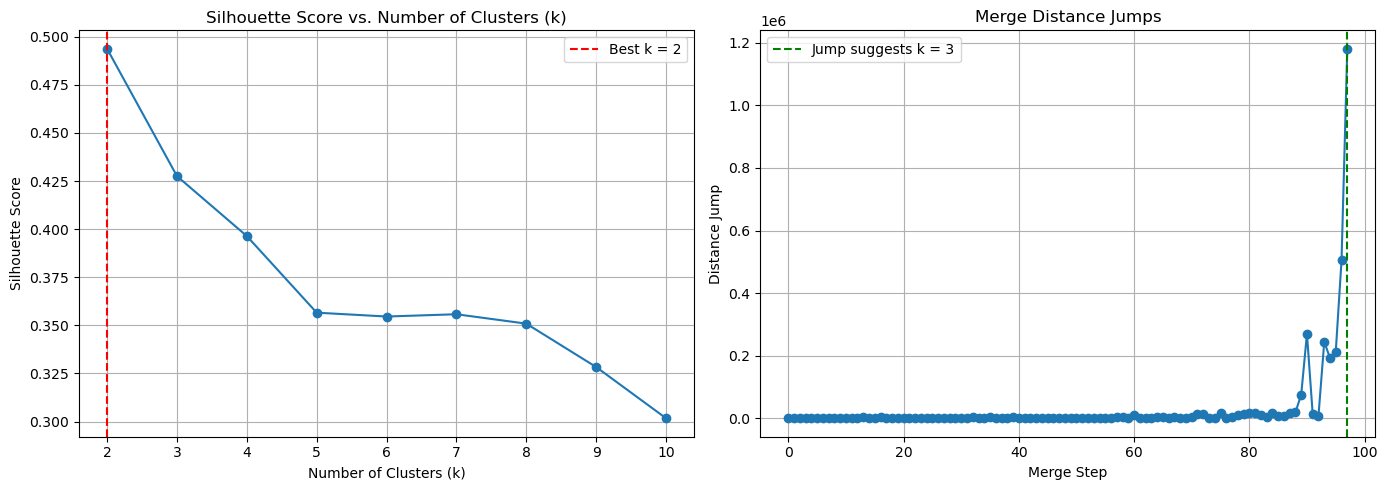

,merge_step,inconsistency_coeff,merge_distance
86,86,1.154496,2.703784e+05
92,92,1.152227,6.718043e+05
90,90,1.143664,3.895158e+05
87,87,1.142849,2.773818e+05
73,73,1.136906,1.501820e+05
72,72,1.135651,1.376448e+05
80,80,1.133241,1.969278e+05
81,81,1.133116,2.142810e+05
77,77,1.132397,1.695916e+05
97,97,1.129859,1.834161e+06


In [93]:
# Full code block to apply and evaluate hierarchical clustering using four methods

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, inconsistent
from sklearn.metrics import silhouette_score
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the average distance matrix
avg_matrix = pd.read_csv(r"D:\coursework_data\AI\matrix_avg_distance.csv", index_col=0)

# Perform linkage (Ward method)
linked = linkage(avg_matrix, method='ward')

# 1. Dendrogram visualization
def plot_dendrogram(linked, labels):
    plt.figure(figsize=(14, 6))
    dendrogram(linked, labels=labels, leaf_rotation=90)
    plt.title("Dendrogram of Hierarchical Clustering")
    plt.xlabel("Words")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()

# 2. Distance jump method (Elbow-like)
def compute_merge_distance_jumps(linked, num_words):
    merge_distances = linked[:, 2]
    merge_diffs = np.diff(merge_distances)
    best_k_jump = num_words - np.argmax(merge_diffs)
    return merge_diffs, best_k_jump

# 3. Silhouette score analysis for multiple k
def compute_silhouette_scores(avg_matrix, linked, max_k=10):
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
    coords_2d = mds.fit_transform(avg_matrix.values)
    scores = []
    for k in range(2, max_k + 1):
        labels = fcluster(linked, k, criterion='maxclust')
        score = silhouette_score(coords_2d, labels)
        scores.append((k, score))
    best_k = max(scores, key=lambda x: x[1])[0]
    return scores, best_k

# 4. Inconsistency coefficient
def compute_inconsistency(linked, top_n=10):
    incons_matrix = inconsistent(linked)
    df = pd.DataFrame({
        "merge_step": range(len(incons_matrix)),
        "inconsistency_coeff": incons_matrix[:, -1],  # 4th column is the coefficient
        "merge_distance": linked[:, 2]
    })
    top_inconsistent = df.sort_values(by="inconsistency_coeff", ascending=False).head(top_n)
    return df, top_inconsistent

# Run all four methods
plot_dendrogram(linked, avg_matrix.index.tolist())

merge_diffs, best_k_jump = compute_merge_distance_jumps(linked, len(avg_matrix))
silhouette_scores, best_k_silhouette = compute_silhouette_scores(avg_matrix, linked)
inconsistency_df, top_inconsistent_merges = compute_inconsistency(linked)

# Plot silhouette and merge jumps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Silhouette scores
k_vals, sil_vals = zip(*silhouette_scores)
axes[0].plot(k_vals, sil_vals, marker='o')
axes[0].set_title("Silhouette Score vs. Number of Clusters (k)")
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Silhouette Score")
axes[0].axvline(x=best_k_silhouette, color='r', linestyle='--', label=f"Best k = {best_k_silhouette}")
axes[0].legend()
axes[0].grid(True)

# Merge distance jumps
axes[1].plot(range(len(merge_diffs)), merge_diffs, marker='o')
axes[1].set_title("Merge Distance Jumps")
axes[1].set_xlabel("Merge Step")
axes[1].set_ylabel("Distance Jump")
axes[1].axvline(x=len(avg_matrix) - best_k_jump, color='g', linestyle='--', label=f"Jump suggests k = {best_k_jump}")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\HC optimization.png')
plt.show()

# Output top inconsistent merges
top_inconsistent_merges


D:\Users\lenovo\anaconda3\envs\nlp_env\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


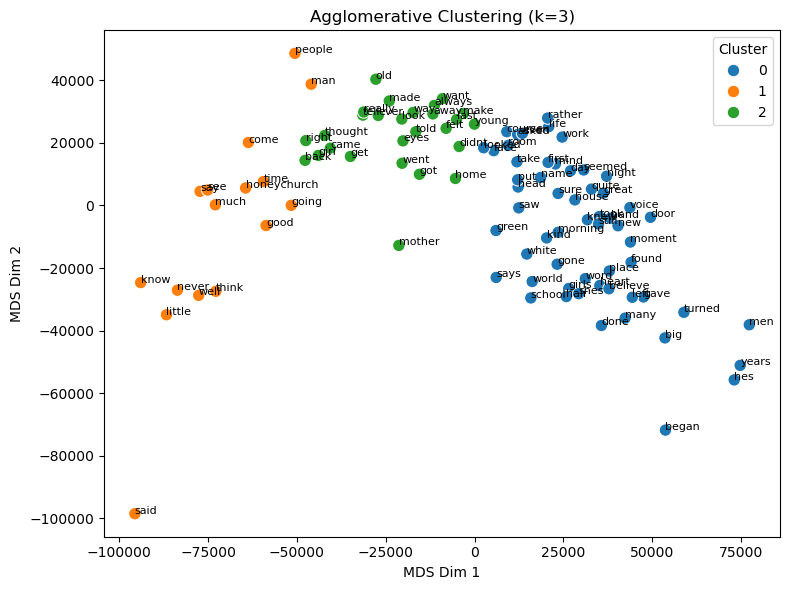

,Cluster 1,Cluster 2,Cluster 3
0,life,man,eyes
1,night,time,way
2,room,people,girl
3,work,honeychurch,home
4,day,said,look
5,course,know,didnt
6,face,think,mother
7,house,going,got
8,head,say,came
9,hand,see,get


In [94]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with k=3
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(avg_matrix)

# Group words by their assigned cluster
agg_cluster_words = {i: [] for i in range(3)}
for word, label in zip(avg_matrix.index, agg_labels):
    agg_cluster_words[label].append(word)

# Create DataFrame for display
agg_cluster_df = pd.DataFrame(dict([(f"Cluster {k+1}", pd.Series(v)) for k, v in agg_cluster_words.items()]))

# Apply MDS for 2D visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
X_2d = mds.fit_transform(avg_matrix)

# Generate cluster labels for k=3
labels_k3 = fcluster(linked, 3, criterion='maxclust')

# Prepare DataFrame for visualization
df_vis = pd.DataFrame(X_2d, columns=['x', 'y'])
df_vis['word'] = avg_matrix.index
df_vis['cluster_k3'] = labels_k3

# Plot the clusters in 2D space (same MDS coords as before)
df_vis['cluster_agg_k3'] = agg_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_vis, x='x', y='y', hue='cluster_agg_k3', palette='tab10', s=80)
for i in range(df_vis.shape[0]):
    plt.text(df_vis.loc[i, 'x'] + 1, df_vis.loc[i, 'y'], df_vis.loc[i, 'word'], fontsize=8)
plt.title("Agglomerative Clustering (k=3)")
plt.xlabel("MDS Dim 1")
plt.ylabel("MDS Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\Agglomerative Clustering (k=3).png')
plt.show()

agg_cluster_df

# **[m5]**

Computing shortest paths: 100%|█████████████████████████████████████████████████████| 100/100 [00:00<00:00, 123.92it/s]


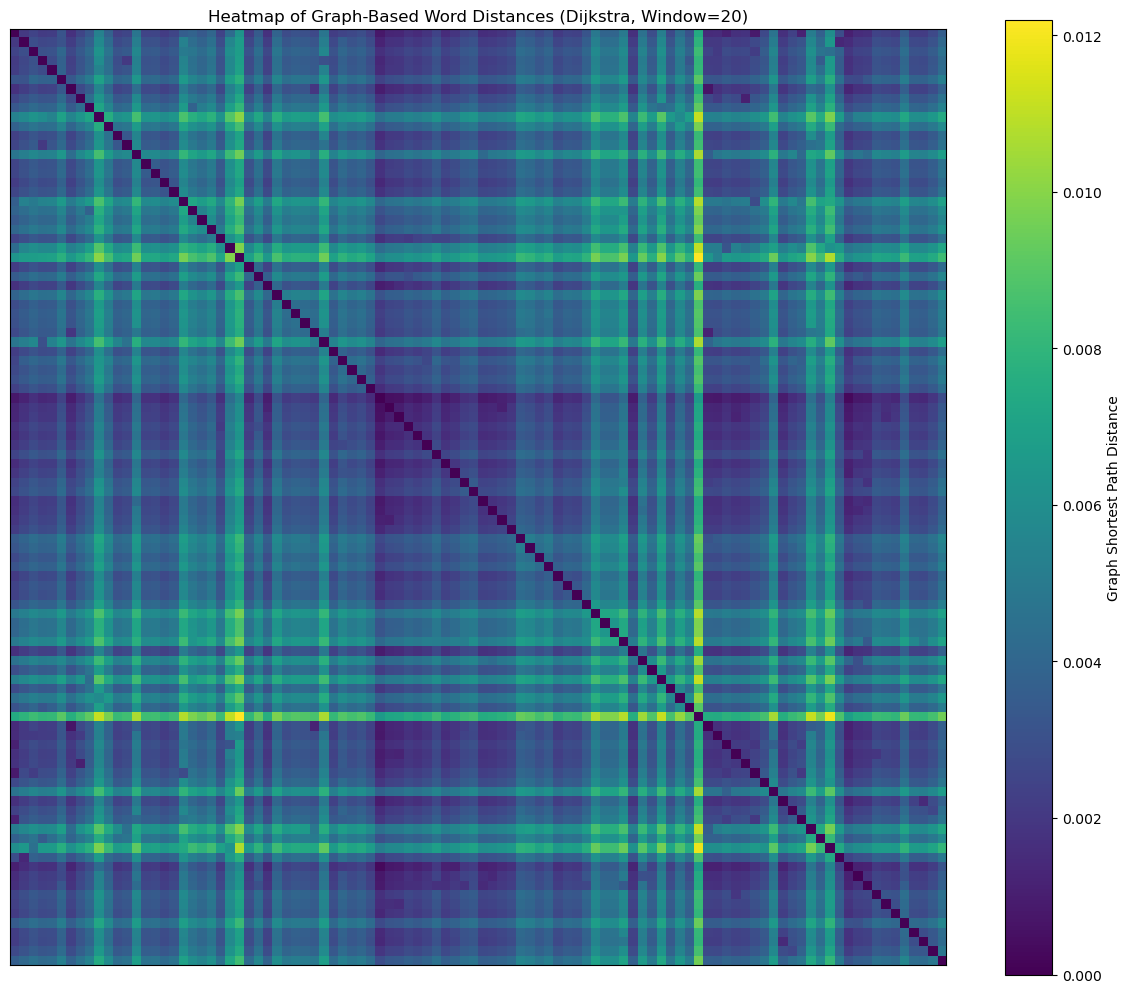

In [98]:
import networkx as nx
from collections import defaultdict
from tqdm import tqdm

# Token list and wordlist already available: tokens, wordlist
# Step 1: Build co-occurrence counts within a window of size 20
window_size = 20
co_occurrence = defaultdict(int)

# Build co-occurrence counts for word pairs within the window
for i in range(len(tokens) - window_size):
    window_tokens = tokens[i:i + window_size]
    window_words = [w for w in window_tokens if w in wordlist]
    for idx1 in range(len(window_words)):
        for idx2 in range(idx1 + 1, len(window_words)):
            w1, w2 = window_words[idx1], window_words[idx2]
            if w1 != w2:
                key = tuple(sorted((w1, w2)))
                co_occurrence[key] += 1

# Step 2: Build graph
G = nx.Graph()
G.add_nodes_from(wordlist)

# Add edges with weights = 1 / co-occurrence frequency
for (w1, w2), freq in co_occurrence.items():
    if freq > 0:
        G.add_edge(w1, w2, weight=1 / freq)

# Step 3: Compute all-pairs shortest paths using Dijkstra
graph_distance_matrix = pd.DataFrame(index=wordlist, columns=wordlist, dtype=float)

for w1 in tqdm(wordlist, desc="Computing shortest paths"):
    lengths = nx.single_source_dijkstra_path_length(G, w1, weight='weight')
    for w2, dist in lengths.items():
        graph_distance_matrix.at[w1, w2] = dist

# Fill diagonal with 0s and keep matrix symmetric
for w in wordlist:
    graph_distance_matrix.at[w, w] = 0
graph_distance_matrix = graph_distance_matrix.fillna(np.inf)

# Save to CSV
graph_distance_matrix.to_csv(r"D:\coursework_data\AI\matrix_graph_distance.csv")

# Heatmap visualization
plt.figure(figsize=(12, 10))
plt.imshow(graph_distance_matrix.astype(float), cmap='viridis', interpolation='nearest')
plt.colorbar(label="Graph Shortest Path Distance")
plt.title("Heatmap of Graph-Based Word Distances (Dijkstra, Window=20)")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\Heatmap of Graph-Based Word Distances (Dijkstra, Window=20).png')
plt.show()

In [99]:
# Analyze unreachable (infinite) distances and connectedness
values = graph_distance_matrix.values

# Upper triangle (excluding diagonal)
n = len(wordlist)
total_pairs = (n * (n - 1)) / 2
inf_pairs = np.isinf(np.triu(values, k=1)).sum()
inf_ratio = inf_pairs / total_pairs

# Find the closest and furthest reachable word pairs (finite only)
min_dist = np.inf
max_dist = -np.inf
min_pair = ()
max_pair = ()

for i in range(n):
    for j in range(i+1, n):
        d = values[i, j]
        if np.isfinite(d):
            if d < min_dist:
                min_dist = d
                min_pair = (wordlist[i], wordlist[j])
            if d > max_dist:
                max_dist = d
                max_pair = (wordlist[i], wordlist[j])

{
    "total_word_pairs": int(total_pairs),
    "inf_pairs": int(inf_pairs),
    "inf_ratio": round(inf_ratio, 4),
    "min_dist": round(min_dist, 4),
    "min_pair": min_pair,
    "max_dist": round(max_dist, 4),
    "max_pair": max_pair
}


{'total_word_pairs': 4950,
 'inf_pairs': 0,
 'inf_ratio': 0.0,
 'min_dist': 0.0003,
 'min_pair': ('said', 'well'),
 'max_dist': 0.0122,
 'max_pair': ('world', 'began')}

In [100]:
# Recalculate eccentricity using a correct format
# Precompute all-pairs shortest path lengths (dictionary of dictionaries)
all_shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Eccentricity: longest shortest path from each node
eccentricities = {
    node: max(lengths.values())
    for node, lengths in all_shortest_paths.items()
}

graph_diameter = max(eccentricities.values())

# Average path length already computed before
avg_path_length = nx.average_shortest_path_length(G, weight='weight')

# Degree distribution: already computed
degrees = dict(G.degree())
top_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

{
    "average_path_length": round(avg_path_length, 4),
    "graph_diameter": round(graph_diameter, 4),
    "top_10_words_by_degree": top_degrees
}


{'average_path_length': 0.0042,
 'graph_diameter': 0.0122,
 'top_10_words_by_degree': [('man', 99),
  ('time', 99),
  ('eyes', 99),
  ('way', 99),
  ('girl', 99),
  ('night', 99),
  ('room', 99),
  ('voice', 99),
  ('mind', 99),
  ('years', 99)]}

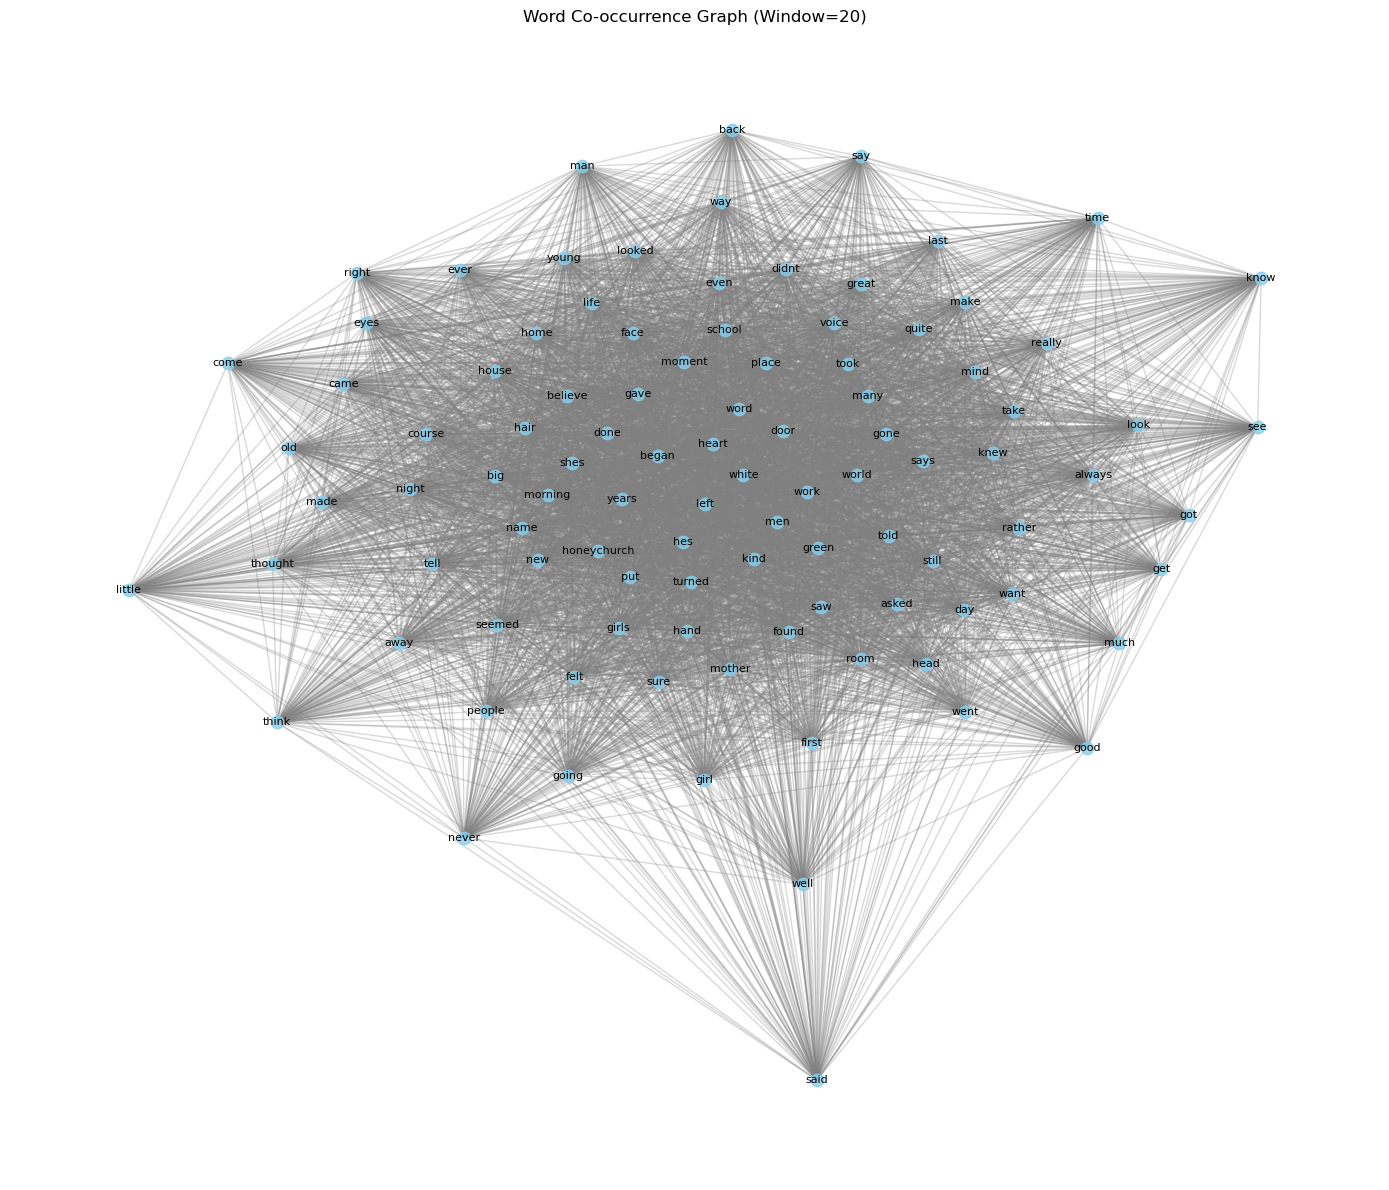

In [101]:
# Visualize the graph structure using spring layout
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42, k=0.3)

# Draw nodes and edges (lighter color for edges, stronger color for central nodes)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G, pos, node_size=80, node_color='skyblue', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Word Co-occurrence Graph (Window=20)")
plt.axis('off')
plt.tight_layout()
plt.show()


# [m6]

In [107]:
# Load re-uploaded matrix_avg_distance.csv to re-enable comparison
avg_matrix = pd.read_csv(r"D:\coursework_data\AI\matrix_avg_distance.csv", index_col=0)
graph_matrix = pd.read_csv(r"D:\coursework_data\AI\matrix_graph_distance.csv", index_col=0)

# Ensure alignment
words = avg_matrix.index.tolist()
assert words == graph_matrix.index.tolist()

from scipy.cluster.hierarchy import linkage, fcluster

# Step 1: Hierarchical clustering (Reproducing m4)
linked_avg = linkage(avg_matrix, method='ward')

# Step 2: Set k=3
labels_avg = fcluster(linked_avg, t=3, criterion='maxclust')

# The graph distance matrix of m5 is hierarchically clustered in the same way
linked_graph = linkage(graph_matrix, method='ward')
labels_graph = fcluster(linked_graph, t=3, criterion='maxclust')

# Build DataFrame for comparison
cluster_comparison_df = pd.DataFrame({
    "Word": words,
    "Cluster_m3": labels_avg,
    "Cluster_m5": labels_graph
}).sort_values(by=["Cluster_m3", "Cluster_m5", "Word"]).reset_index(drop=True)

cluster_comparison_df

D:\Users\TEMP\ipykernel_13416\3046761315.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_avg = linkage(avg_matrix, method='ward')
D:\Users\TEMP\ipykernel_13416\3046761315.py:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_graph = linkage(graph_matrix, method='ward')


,Word,Cluster_m3,Cluster_m5
0,asked,1,1
1,big,1,1
2,course,1,1
3,face,1,1
4,first,1,1
...,...,...,...
95,say,3,1
96,see,3,1
97,think,3,1
98,time,3,1


Change analysis

In [110]:
# Filter the words change cluster
changed_words_df = cluster_comparison_df[
    cluster_comparison_df["Cluster_m3"] != cluster_comparison_df["Cluster_m5"]
].reset_index(drop=True)

# Group by path and collect statistics
grouped_transitions = changed_words_df.groupby(["Cluster_m3", "Cluster_m5"])["Word"].apply(list).reset_index()
grouped_transitions["Count"] = grouped_transitions["Word"].apply(len)
grouped_transitions["Example_Words"] = grouped_transitions["Word"].apply(lambda x: ', '.join(x[:10]))

# list them in descending order
grouped_transitions = grouped_transitions.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Show results
grouped_transitions = grouped_transitions[["Cluster_m3", "Cluster_m5", "Count", "Example_Words"]]
print(grouped_transitions)


   Cluster_m3  Cluster_m5  Count  \
0           2           1     26   
1           1           2     22   
2           3           1     16   
3           1           3     15   

                                       Example_Words  
0  always, away, back, came, didnt, ever, eyes, g...  
1  believe, day, door, even, gave, gone, green, h...  
2  come, going, good, honeychurch, know, little, ...  
3  began, done, found, hair, house, left, many, m...  


Add ARI and NMI


Adjusted Rand Index (ARI): 0.03
Normalized Mutual Information (NMI): 0.27


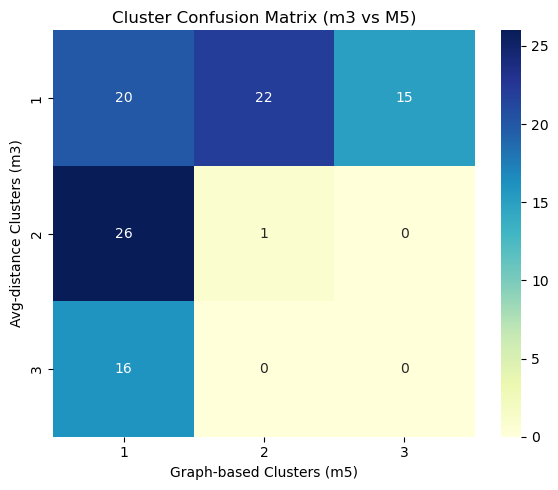

In [115]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate ARI & NMI for consistency comparison
ari = adjusted_rand_score(labels_avg, labels_graph)
nmi = normalized_mutual_info_score(labels_avg, labels_graph)

print(f"\nAdjusted Rand Index (ARI): {ari:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Create confusion matrix (number of clusters = 3)
cm = confusion_matrix(labels_avg, labels_graph, labels=[1, 2, 3])

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", cbar=True, xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Graph-based Clusters (m5)")
plt.ylabel("Avg-distance Clusters (m3)")
plt.title("Cluster Confusion Matrix (m3 vs M5)")
plt.tight_layout()
plt.savefig(r'D:\coursework_data\AI\Cluster Confusion Matrix (m3 vs m5).png')
plt.show()

